Thinking1:奇异值分解SVD的原理是怎样的，都有哪些应用场景
答：对非对称的矩阵进行矩阵分解，将m*n的矩阵通过矩阵与自己的转置矩阵相乘获得对称矩阵，然后进行分解。应用在降维、压缩等场景中，例如对图片提取前k个重要维度，用这些维度存储图片不仅能减少空间，也对图像的清晰度造成的影响不大，也可以应用于推荐系统的特征降维中。

Thinking2:funkSVD, BiasSVD，SVD++算法之间的区别是怎样的
答：三种算法都是矩阵分解，但是funkSVD的目标函数为学习出来的值和真实值之间的差的平方加上正则化项，BiasSVD的目标函数加入了用户和商品的偏差项，SVD++的目标函数加入了用户的隐式反馈。

Thinking3:矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足
答：可以用于预测用户打分，抽取用户主要特征维度等场景中。不足在于，矩阵分解只考虑了user和item两个维度，实际场景中很多都为多维，无法应用，另外矩阵分解的可解释性较差，在业务中很难应用。

Thinking4:假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的
答：首先获取到所有小说的摘要，对所有的摘要做分词处理，去掉停用词等数据预处理，然后用tfidf的方式建立每个小说的文本特征，计算所有小说与用户看的那部小说的余弦距离，推荐相似度高的TOP-N个小说给用户。

Thinking5:Word2Vec的应用场景有哪些
答：Word2Vec实际就是将文本转化成向量的过程，可以应用在很多推荐系统中，例如用来计算商品和商品之间，公众号和公众号之间，博主和博主之间的相似度，从而为用户推荐其可能更加感兴趣的内容。
    

# Action1

(1080, 1920)


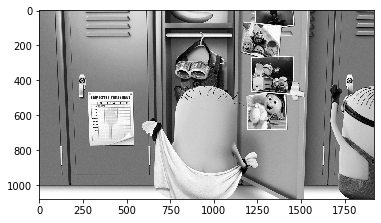

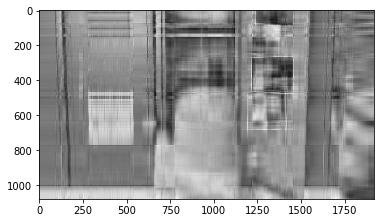

[[-3.12910538 -5.07917156 -5.28549475 ... 13.46121492 13.30065845
  13.7035315 ]
 [-0.63974397 -3.5854947  -4.78923054 ... 14.4427577  13.30786451
  17.71972045]
 [-2.03391422 -3.98746792 -4.19587687 ... 13.28500849 12.16205961
  17.56390486]
 ...
 [ 6.27324616  6.19369213  6.16673186 ...  3.25452283  5.42900357
  -2.58795904]
 [ 6.69155914  6.59537063  6.55093245 ... -2.10086337 -3.89387775
   2.10462293]
 [ 7.29871104  7.19494796  7.13890662 ... -1.43521995 -0.19301068
  -0.19217003]]


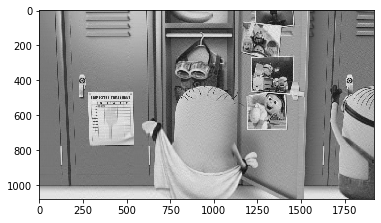

[[ -3.12741709  -3.00140864  -2.76889591 ...  -8.70746365  -8.50305976
   -9.92348721]
 [ -0.43153109  -1.57101302  -2.36603566 ...  -5.66545573  -5.41005794
   -1.5793243 ]
 [ -2.18250586  -2.35342699  -2.16391996 ...  -2.93467099  -1.84324601
    4.15866597]
 ...
 [  0.97924816  -0.51670387  -0.87052111 ...  -8.82554921  -3.25693889
   -4.97188817]
 [  1.16585972  -0.3583751   -0.82301127 ... -18.47536647 -17.60098288
   -4.75290379]
 [  1.50239658  -0.24486957  -0.87039071 ... -16.02704832 -12.96044892
   -5.91948942]]


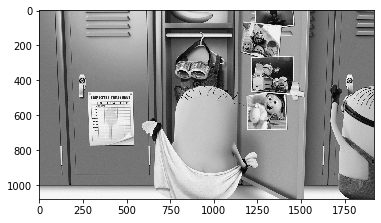

[[ 0.67726272  0.90100218  0.78243939 ...  1.78442907  0.17473097
  -3.58644063]
 [ 0.14645183  0.98963033  1.24845383 ... -2.37207617  2.53974727
   2.02292441]
 [ 0.17263842 -0.14998709 -0.92607295 ... -2.47195121  0.48952238
   1.0995349 ]
 ...
 [-1.56877169 -0.24822528  1.18921133 ...  3.25276809  5.13339631
  -1.06234451]
 [-1.8725257  -1.41656867 -0.54177948 ... -1.28840413 -1.95159613
   1.85746936]
 [-0.2777977  -0.41636608 -0.27639449 ... -0.39168883 -1.03602426
  -0.27415552]]


In [45]:
from scipy.linalg import svd
from PIL import Image
import matplotlib.pylab as plt
import numpy as np
image = Image.open('G:\\python_lesson\\lyr_test.bmp') 
image=image.convert('L')
A = np.array(image)
# 显示原图像
print(A.shape)
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
    s_temp = np.zeros(s.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(s.shape[0])
    temp = np.dot(p,s)
    temp = np.dot(temp,q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()
    print(A-temp)
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 10)
get_image_feature(s, 108)
get_image_feature(s, 500)

# Action3

In [18]:
#分词
import jieba
import os
from utils import files_processing

In [30]:
# 源文件所在目录
source_folder = 'G:\\python_lesson\\L4-code\\L4\\word2vec\\three_kingdoms\\source\\'
segment_folder = 'G:\\python_lesson\\L4-code\\L4\\word2vec\\three_kingdoms\\segment\\'
# 对source中的txt文件进行分词，输出到segment目录中
#source_folder = 'G:\\python_lesson\\L4-code\\L4\\word2vec\\journey_to_the_west\\source\\'
#segment_folder = 'G:\\python_lesson\\L4-code\\L4\\word2vec\\journey_to_the_west\\segment\\'
#file_list=files_processing.get_files_list(source_folder, postfix='*.txt')

# 字词分割，对整个文件内容进行字词分割
def segment_lines(file_list,segment_out_dir,stopwords=[]):
    for i,file in enumerate(file_list):
        segment_out_name=os.path.join(segment_out_dir,'segment_{}.txt'.format(i))
        with open(file, 'rb') as f:
            document = f.read()
            document_cut = jieba.cut(document)
            sentence_segment=[]
            for word in document_cut:
                if word not in stopwords:
                    #print(word)
                    sentence_segment.append(word)
            result = ' '.join(sentence_segment)
            result = result.encode('utf-8')
            with open(segment_out_name, 'wb') as f2:
                f2.write(result)

# 对source中的txt文件进行分词，输出到segment目录中

file_list=files_processing.get_files_list(source_folder, postfix='*.txt')
#print (file_list)
segment_lines(file_list, segment_folder)

In [33]:
# -*-coding: utf-8 -*-
# 先运行 word_seg进行中文分词，然后再进行word_similarity计算
# 将Word转换成Vec，然后计算相似度 
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_folder = 'G:\\python_lesson\\L4-code\\L4\\word2vec\\three_kingdoms\\segment\\segment_0.txt'
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
print(model.wv.similarity('张飞', '刘备'))
print(model.wv.most_similar('曹操'))
#print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))
# 设置模型参数，进行训练
#model2 = word2vec.Word2Vec(sentences, size=128, window=5, min_count=5, workers=multiprocessing.cpu_count())
# 保存模型
#model2.save('./models/word2Vec.model')
#print(model.wv.similarity('曹操', '刘备'))
#print(model.wv.most_similar('曹操'))
#print(model2.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))


0.9461346
[('孙权', 0.9950023293495178), ('先主', 0.9932817220687866), ('众官', 0.9921112656593323), ('司马懿', 0.9908697605133057), ('回报', 0.9907355308532715), ('已', 0.9906618595123291), ('夫人', 0.9905868768692017), ('会', 0.9905054569244385), ('相见', 0.9904440641403198), ('惇', 0.9904028177261353)]


In [36]:
print(model.wv.most_similar(positive=['曹操', '大乔'], negative=['刘备']))

[('屏风', 0.9770486354827881), ('两翼', 0.9751443862915039), ('喊', 0.9744237065315247), ('驱', 0.974035382270813), ('旱路', 0.9738526344299316), ('伏于寨', 0.9729980230331421), ('收集', 0.9725710153579712), ('黑气', 0.9725047945976257), ('上火', 0.9724103808403015), ('卧于', 0.9714545011520386)]


In [37]:
print(model.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

[('某', 0.9981215596199036), ('丞相', 0.9970743656158447), ('臣', 0.9968363046646118), ('主公', 0.996706485748291), ('朕', 0.9965814352035522), ('既', 0.9955646991729736), ('卿', 0.9947243928909302), ('之言', 0.9935752153396606), ('今蜀兵', 0.9928301572799683), ('冷笑', 0.9927114844322205)]
